# Author : Balaji Jothi Balaiyan
# Problem Case: Create a wheather forcast plot using the opensource api

In [16]:
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Get Api data from the openwheather api to get the next 7 days forcast

In [17]:
try:
    resp = requests.get('https://api.openweathermap.org/data/2.5/onecall?lat=33.441792&lon=-94.037689&appid=acd0b5050cc3fe721e671122f146f174')
    value = resp.json()
except:
    print("Something went wrong")
    if resp.status_code != 200:
        raise ApiError('GET /api/ {}'.format(resp.status_code))

## Process the and stream data for matplotlib

In [18]:
value = resp.json()
date_time = []
temp_min = []
temp_max = []
humidity = []
for i in value['daily']:
    days = dt.datetime.utcfromtimestamp(i['dt']).strftime("%Y-%m-%d")
    date_time.append(days)
    temp_min.append(i['temp']['min'])
    temp_max.append(i['temp']['max'])
    humidity.append(i['humidity'])

## Created a matplotlib for Tempearture maximum and minimum

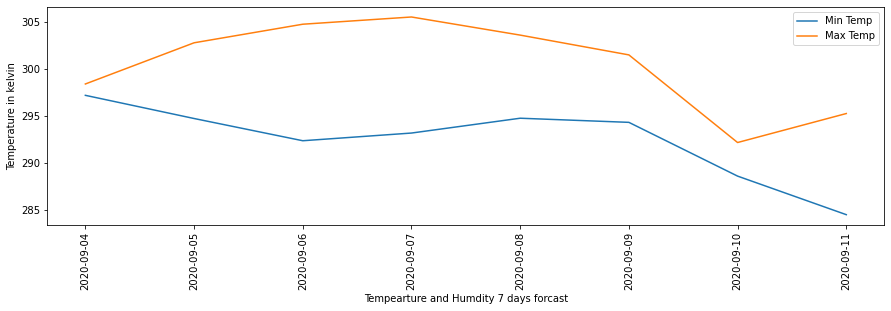

In [19]:
date_time = pd.to_datetime(date_time)
DF_min = pd.DataFrame()
DF_max = pd.DataFrame()
DF_min['temp_min'] = temp_min
DF_max['temp_max'] = temp_max
DF_min = DF_min.set_index(date_time)
DF_max = DF_max.set_index(date_time)

plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
plt.xlabel("Tempearture and Humdity 7 days forcast")
plt.ylabel("Temperature in kelvin")
plt.plot(DF_min, label='Min Temp')
plt.plot(DF_max, label='Max Temp')
plt.legend()

## Created a matplotlib for humidity

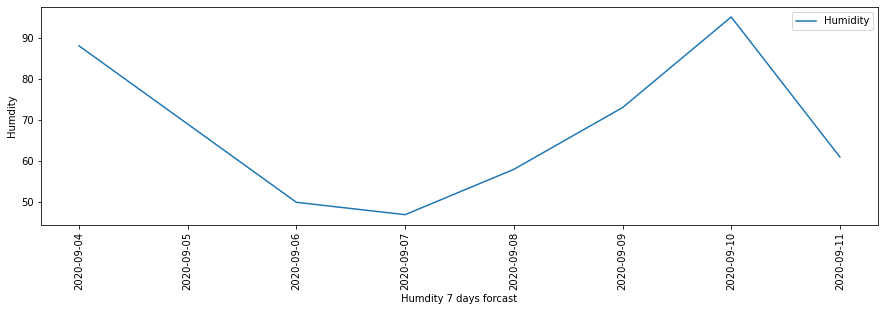

In [20]:
DF_humidity = pd.DataFrame()
DF_humidity['humidity'] = humidity
DF_humidity = DF_humidity.set_index(date_time)
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
plt.xlabel("Humdity 7 days forcast")
plt.ylabel("Humdity")
plt.plot(label='observed')
plt.plot(DF_humidity, label='Humidity')
plt.legend()